<a href="https://colab.research.google.com/github/StevenWestmoreland/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/DS17_U4S2M1_TensorFlowAssignment_StevenWestmoreland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [4]:
import numpy as np
import tensorflow as tf 

data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [5]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

Exception ignored in: <bound method NpzFile.__del__ of <numpy.lib.npyio.NpzFile object at 0x7f87f887e860>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py", line 230, in __del__
    self.close()
  File "/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py", line 221, in close
    if self.zip is not None:
AttributeError: 'NpzFile' object has no attribute 'zip'


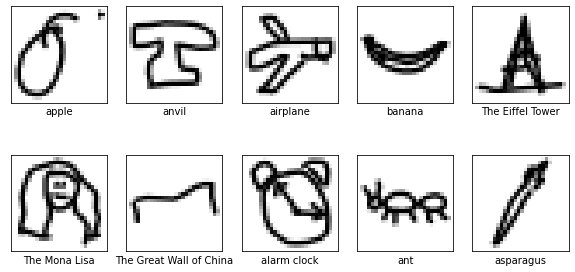

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [7]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [15]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def create_model(lr=.01):
  opt = SGD(learning_rate=lr)

  model = Sequential(
      [
       Dense(32, activation='sigmoid', input_dim=784),
       Dense(32, activation='sigmoid'),
       Dense(10, activation='softmax')       
      ]
)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.90,
                                                    test_size = 0.10,
                                                    random_state=42)

In [19]:
quickdraw_model = create_model()
baseline = quickdraw_model.fit(X_train, y_train, epochs=30,
                                         batch_size=32,
                                         validation_data=(X_test, y_test))

Epoch 1/30
2813/2813 [==============================] - 6s 2ms/step - loss: 1.8400 - accuracy: 0.4843 - val_loss: 1.4420 - val_accuracy: 0.6168
Epoch 2/30
2813/2813 [==============================] - 6s 2ms/step - loss: 1.2732 - accuracy: 0.6465 - val_loss: 1.1449 - val_accuracy: 0.6662
Epoch 3/30
2813/2813 [==============================] - 6s 2ms/step - loss: 1.0960 - accuracy: 0.6824 - val_loss: 1.0411 - val_accuracy: 0.6945
Epoch 4/30
2813/2813 [==============================] - 6s 2ms/step - loss: 1.0173 - accuracy: 0.6972 - val_loss: 1.0107 - val_accuracy: 0.6948
Epoch 5/30
2813/2813 [==============================] - 6s 2ms/step - loss: 0.9668 - accuracy: 0.7095 - val_loss: 0.9470 - val_accuracy: 0.7160
Epoch 6/30
2813/2813 [==============================] - 6s 2ms/step - loss: 0.9399 - accuracy: 0.7158 - val_loss: 0.9474 - val_accuracy: 0.7017
Epoch 7/30
2813/2813 [==============================] - 6s 2ms/step - loss: 0.9219 - accuracy: 0.7179 - val_loss: 0.9248 - val_accuracy:

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [20]:
baseline.history

{'accuracy': [0.484333336353302,
  0.6464999914169312,
  0.682366669178009,
  0.6972222328186035,
  0.7095000147819519,
  0.7157666683197021,
  0.7178888916969299,
  0.7245333194732666,
  0.729877769947052,
  0.7326222062110901,
  0.731844425201416,
  0.7365555763244629,
  0.7381888628005981,
  0.7322221994400024,
  0.7402111291885376,
  0.7458778023719788,
  0.7442444562911987,
  0.7484555840492249,
  0.7485111355781555,
  0.7520333528518677,
  0.7490444183349609,
  0.7503666877746582,
  0.7535333037376404,
  0.7519000172615051,
  0.7532444596290588,
  0.7559000253677368,
  0.7563222050666809,
  0.7535555362701416,
  0.7506444454193115,
  0.7565110921859741],
 'loss': [1.8400154113769531,
  1.2732447385787964,
  1.0959843397140503,
  1.0172538757324219,
  0.9668276309967041,
  0.9398611187934875,
  0.9219410419464111,
  0.9001471400260925,
  0.8821855783462524,
  0.8605138659477234,
  0.8656034469604492,
  0.8516981601715088,
  0.8505805730819702,
  0.8565877676010132,
  0.83794808387

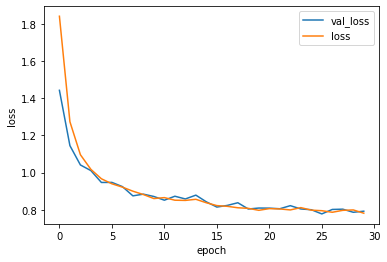

In [33]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(baseline.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df, label='val_loss')
ax = sns.lineplot(x='epoch', y='loss', data=df, label='loss');

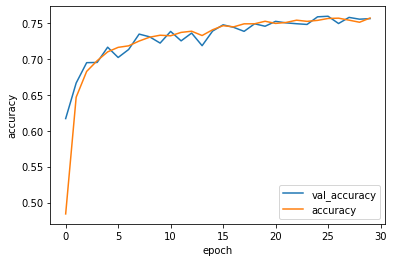

In [34]:
ax = sns.lineplot(x='epoch', y='val_accuracy', data=df, label='val_accuracy')
ax = sns.lineplot(x='epoch', y='accuracy', data=df, label='accuracy');

We probably could have stopped training somewhere around the 20-25 epoch mark. At this point, both validation and training accuracy (as well as both losses) more or less converge. Furthermore, there isn't much gained going father than that point for any of the four. 

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [36]:
from tensorflow.keras.optimizers import Adam

def create_adam_model(lr=.01):
  opt = Adam(learning_rate=lr)

  model = Sequential(
      [
       Dense(32, activation='sigmoid', input_dim=784),
       Dense(32, activation='sigmoid'),
       Dense(10, activation='softmax')       
      ]
)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [37]:
quickdraw_model_adam = create_adam_model()
baseline_adam = quickdraw_model_adam.fit(X_train, y_train, epochs=30,
                                         batch_size=32,
                                         validation_data=(X_test, y_test))

Epoch 1/30
2813/2813 [==============================] - 7s 2ms/step - loss: 1.5739 - accuracy: 0.4301 - val_loss: 1.4715 - val_accuracy: 0.4766
Epoch 2/30
2813/2813 [==============================] - 6s 2ms/step - loss: 1.4016 - accuracy: 0.5040 - val_loss: 1.3079 - val_accuracy: 0.5275
Epoch 3/30
2813/2813 [==============================] - 6s 2ms/step - loss: 1.3268 - accuracy: 0.5329 - val_loss: 1.3017 - val_accuracy: 0.5495
Epoch 4/30
2813/2813 [==============================] - 6s 2ms/step - loss: 1.2830 - accuracy: 0.5537 - val_loss: 1.2597 - val_accuracy: 0.5718
Epoch 5/30
2813/2813 [==============================] - 6s 2ms/step - loss: 1.3151 - accuracy: 0.5402 - val_loss: 1.2759 - val_accuracy: 0.5459
Epoch 6/30
2813/2813 [==============================] - 6s 2ms/step - loss: 1.2604 - accuracy: 0.5689 - val_loss: 1.2602 - val_accuracy: 0.5736
Epoch 7/30
2813/2813 [==============================] - 7s 2ms/step - loss: 1.2321 - accuracy: 0.5829 - val_loss: 1.2556 - val_accuracy:

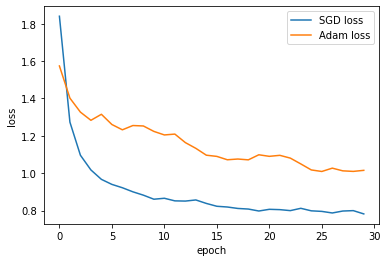

In [38]:
df_adam = pd.DataFrame.from_records(baseline_adam.history)
df_adam['epoch'] = [i for i in range(df_adam.shape[0])]

ax = sns.lineplot(x='epoch', y='loss', data=df, label='SGD loss')
ax = sns.lineplot(x='epoch', y='loss', data=df_adam, label='Adam loss');

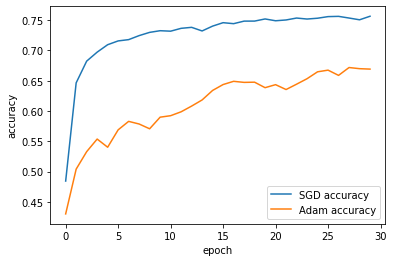

In [39]:
ax = sns.lineplot(x='epoch', y='accuracy', data=df, label='SGD accuracy')
ax = sns.lineplot(x='epoch', y='accuracy', data=df_adam, label='Adam accuracy');

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)